Replicar as análises de algum notebook no Kaggle, que estejam entre os mais votados para o dataset escolhido, para que assim você possa aprender mais funcionalidades do Pandas. Ou seja, você vai acessar alguns datasets do Kaggle, ordenar os notebooks de acordo com o número de votos e aprender com os que estiverem entre os primeiros. Replique as análises deste notebook para outro dataset qualquer de sua escolha. Inclua células com comentários a respeito das descobertas (ex.: "vemos que pessoas da cidade XPTO gastam mais que as pessoas de outras cidades")

In [10]:
# o dataset escolhido foi The Big Five European Soccer Leagues, no qual tem dados de todas as cinco
# maiores ligas europeias e o notebook utilizado para replicar e aprender com ele foi:
# MLS Analysis: Game Scores que tem como objetivo demonstrar o quão comum se dão os placares em um jogo de futebol.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# começando importando o dataset e visualizando seu formato

dados = pd.read_csv('Dataset da Semana 3\BIG FIVE 1995-2019.csv')
dados.head()

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts)
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1


In [11]:
# aparentemente o dataset escolhido é bem estruturado e limpo então pularemos essa etapa
# no notebook escolhido apos a limpeza de dados ele vai atras da matriz de quantos gols são marcados
# o codigo a seguir tem como objetivo obter qual a quantidade maxima de gols marcados 

gols_max = max(dados['FT Team 1'].max(), dados['FT Team 2'].max())
ms = gols_max + 1 
gols_max

10

In [16]:
# com a quantidade maxima de colunas já definidas podemos criar uma matriz usando um array numpy 
# e partindo dela usamos um loop for adicionamos 1 para cada ocorrencia do placar

freq_placares_np = np.zeros((ms, ms), dtype = np.int32)
for i, row in dados.iterrows():
    if row['FT Team 1'] > row['FT Team 2']:
        freq_placares_np[row['FT Team 1']][row['FT Team 2']] += 1 
    else:
        freq_placares_np[row['FT Team 2']][row['FT Team 1']] += 1

# após feita a matriz utilizamos o dataframe para expor da melhor forma a matrix e a função transpose para obter a mesma matriz transposta

freq_placares_df = pd.DataFrame(freq_placares_np).transpose()
freq_placares_df


,0,1,2,3,4,5,6,7,8,9,10
0,3649,7869,5585,2787,1150,391,117,32,16,3,0
1,0,5331,6616,3172,1181,382,113,27,8,3,0
2,0,0,2252,1784,657,177,67,8,5,1,1
3,0,0,0,425,269,76,23,4,1,0,0
4,0,0,0,0,51,27,4,2,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# por questões de observação fica melhor ter a matriz apresentada de baixo pra cima

freq_placares_df = freq_placares_df.iloc[::-1]
freq_placares_df

,0,1,2,3,4,5,6,7,8,9,10
10,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0
4,0,0,0,0,51,27,4,2,0,0,0
3,0,0,0,425,269,76,23,4,1,0,0
2,0,0,2252,1784,657,177,67,8,5,1,1
1,0,5331,6616,3172,1181,382,113,27,8,3,0


In [20]:
# nessa etapa ele constroi um mask que em suma é uma matriz repleta de 1 e 0 que será usada na plotagem do gráfico dando um efeito daora no gráfico final
# importante saber que o mask se aplica no nosso gráfico porque atende a um padrão onde metade da matriz possue um resultado que não sera usado gráfico final

mask = np.zeros_like(freq_placares_df)
mask[np.triu_indices_from(mask, k = 1)] = True
mask = np.array(mask, dtype = np.float32)
mask = np.flip(mask, axis = 1)
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# substituindo agora o zero por um sinal que deixa o plot do gráfico final mais bonito e que não traga nenhum problema sobre o entendimento do código
# usando um loop for que substitua tudo que for 0 por -

anotações = pd.DataFrame(freq_placares_df, dtype = str)
for i in range(ms):
    for j in range(ms):
        if anotações[i][j] == "0":
            anotações[i][j] = '-'
anotações

,0,1,2,3,4,5,6,7,8,9,10
10,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,3,-,-,-,-,-
4,-,-,-,-,51,27,4,2,-,-,-
3,-,-,-,425,269,76,23,4,1,-,-
2,-,-,2252,1784,657,177,67,8,5,1,1
1,-,5331,6616,3172,1181,382,113,27,8,3,-


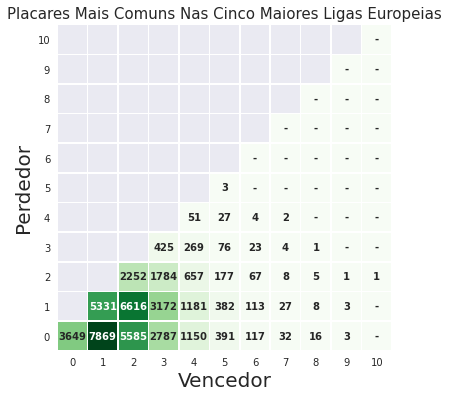

In [29]:
# partindo para a última parte que é a própria plotagem do gráfico a partir do Dataframe usando o metodo heatmap que é um mapa de calor onde maior a ocorrência mais forte se dar a cor ilustrativa
# nessa etapa vale ressaltar o forte uso do seaborn (que não foi pedido na trilha) então uma análise sobre cada função e parâmetro cabe para maior entendimento 
# destaque para alguns parâmetros como o mask no qual atribuimos o array mask criada anteriormente e a cmap que define o esquema de cores que vai ser utilizada

with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize = (6, 6))
    ax = sns.heatmap(freq_placares_df.astype(float), linewidths = 0.5, annot = anotações,
    fmt = 's', mask = mask, cbar = False, cmap = 'Greens', annot_kws = {'fontweight' : 'demi'})

# definindo os últimos detalhes do gráfico como o nome do gráfico e os rótulos de x e y 

plt.yticks(rotation = 0)
plt.xlabel('Vencedor', size = 20)
plt.ylabel('Perdedor', size = 20)
plt.title('Placares Mais Comuns Nas Cinco Maiores Ligas Europeias', size = 15)
plt.savefig("./vencedores_perdedores_número.png", bbox_inches = 'tight')
plt.show()